# Regressão linear com uma variável

## Bibliotecas

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importação dos dados

In [64]:
data = pd.read_csv('data/ex1data1.txt', header = None)

data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


## Visualização de dados

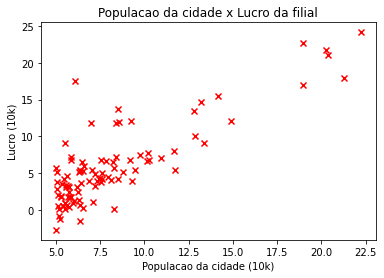

In [79]:
X = np.array(data.iloc[:,0])
y = np.array(data.iloc[:,1])
m = len(y)

plt.scatter(X, y, color='red', marker='x')
plt.title('Populacao da cidade x Lucro da filial')
plt.xlabel('Populacao da cidade (10k)')
plt.ylabel('Lucro (10k)')
plt.show()

## Gradiente descendente

### Função de custo

In [81]:
def compute_cost(X, y, theta):
  m = len(y)
  return (np.sum(np.power(X @ theta - y, 2))) / (2 * m)

X_ones = np.stack([np.ones(m), X], axis=1)
cost = compute_cost(X_ones, y, [0.0, 0.0])

print('J: ', cost)

J:  32.072733877455676


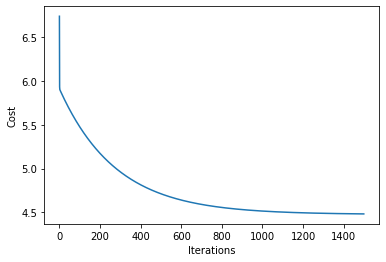

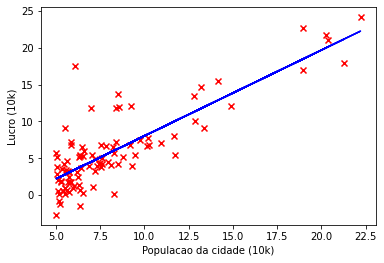

theta: [-3.63029144  1.16636235]
Lucro em regiões com população de 35.000 habitantes: 4519.7678677017675
Lucro em regiões com população de 70.000 habitantes: 45342.45012944714


In [77]:
def gradient_descent(X, y, theta, alpha, epochs):
  m = len(y)
  cost = np.zeros(epochs)
  for i in range(epochs):
    h = X @ theta
    theta = theta - alpha * (X.T @ (h - y)) / m
    cost[i] = compute_cost(X, y, theta)
  
  return cost, theta

theta = np.zeros(2)
cost, theta = gradient_descent(X_ones, y, theta, 0.01, 1500)

plt.plot(cost)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

plt.scatter(X_ones[:,1], y, color='red', marker='x')
plt.xlabel('Populacao da cidade (10k)')
plt.ylabel('Lucro (10k)')
plt.plot(X_ones[:,1], X_ones @ theta, color='blue')
plt.show()

print(f'theta: {theta}')

print(f'Lucro em regiões com população de 35.000 habitantes: {np.dot([1, 3.5], theta) * 10000}')
print(f'Lucro em regiões com população de 70.000 habitantes: {np.dot([1, 7.0], theta) * 10000}')

## Visualização da função de custo

<Figure size 432x288 with 0 Axes>

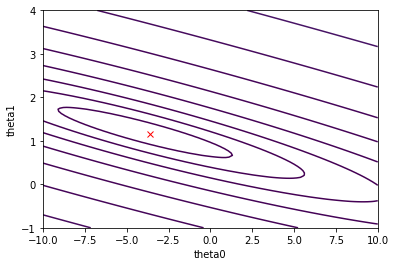

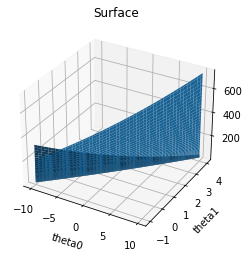

True


In [76]:
theta0_values = np.linspace(-10, 10, 100)
theta1_values = np.linspace(-1, 4, 100)

J = np.zeros((len(theta0_values), len(theta1_values)))

for i, theta0 in enumerate(theta0_values):
  for j, theta1 in enumerate(theta1_values):
    J[i,j] = compute_cost(X_ones, y, [theta0, theta1])

fig = plt.figure()
fig, ax = plt.subplots()
ax.contour(theta0_values, theta1_values, J.T, levels=np.logspace(-1, 4, 20))
ax.plot(theta[0], theta[1], 'rx')
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.show()

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(theta0_values, theta1_values, J.T)
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.title('Surface')
plt.show()